/var/folders/x0/9dpvqwcj6f3915c0b102q0bc0000gn/T/ipykernel_20393/2596542095.py:14: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 / denominator
/var/folders/x0/9dpvqwcj6f3915c0b102q0bc0000gn/T/ipykernel_20393/2596542095.py:21: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result, error = quad(equation, s0, 1 / alpha, args=(alpha, b, delta[0],0))
/var/folders/x0/9dpvqwcj6f3915c0b102q0bc0000gn/T/ipykernel_20393/2596542095.py:24: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is

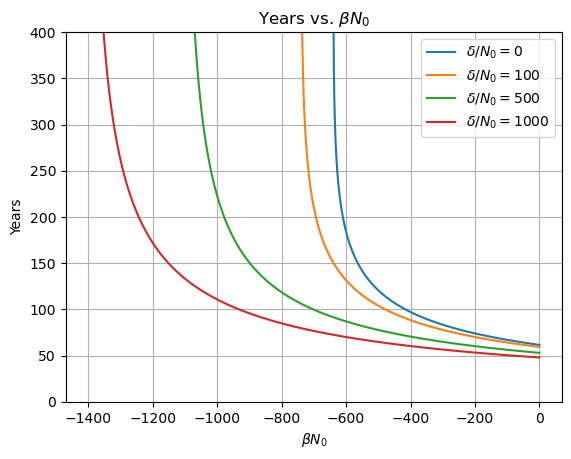

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

alpha = 4e-7
beta1 = np.linspace(-0.016, 0, 1000) 
beta2 = np.linspace(-0.0185, 0, 1000) 
beta3 = np.linspace(-0.027, 0, 1000) 
beta4 = np.linspace(-0.035, 0, 1000) 
s0 = 4e4 
delta = np.array([0, 4e6, 2e7, 4e7])
def equation(s, alpha, beta, d=0, ga = 0):
    denominator = alpha * s**2 + beta * s + d / s + ga
    return 1 / denominator

results1 = []
results2 = []
results3 = []
results4 = []
for b in beta1:
    result, error = quad(equation, s0, 1 / alpha, args=(alpha, b, delta[0],0))
    results1.append(result)
for b in beta2:
    result, error = quad(equation, s0, 1 / alpha, args=(alpha, b, delta[1],0))
    results2.append(result)
for b in beta3:
    result, error = quad(equation, s0, 1 / alpha, args=(alpha, b, delta[2],0))
    results3.append(result)
for b in beta4:
    result, error = quad(equation, s0, 1 / alpha, args=(alpha, b, delta[3],0))
    results4.append(result)

plt.plot(beta1*s0, results1, label=r"$\delta/N_0 = 0$")
plt.plot(beta2*s0, results2, label=r"$\delta/N_0 = 100$")
plt.plot(beta3*s0, results3, label=r"$\delta/N_0 = 500$")
plt.plot(beta4*s0, results4, label=r"$\delta/N_0 = 1000$")
plt.ylim(0,400)
plt.xlabel(r"$\beta N_0$")
plt.ylabel(r"Years")
plt.title(r"Years vs. $\beta N_0$")
plt.legend()
plt.grid()
plt.show()